In [1]:
from GA_Clustering import GACluster
from matplotlib import pyplot as plt
import random
import numpy as np
from sklearn.metrics import silhouette_score

In [2]:
points = [[6.5, 0], [9, 0], [10, 0], [15, 0], [16, 0], [18.5, 0]] 

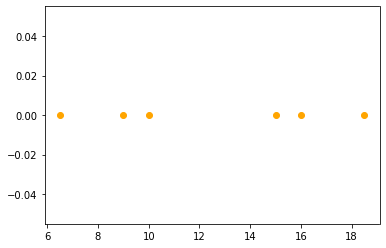

In [3]:
# Iscrtavanje tacaka
xs, ys = list(map(lambda p: p[0], points)), list(map(lambda p: p[1], points))
plt.scatter(xs, ys, c='orange')
plt.show()

3.0
fig:  3.0 2 1


C:\Users\Windows\Desktop\riProjekat\GA-clustering\ga.py:203: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  fig.add_subplot(n+1, 1, plt_ind )
C:\Users\Windows\Desktop\riProjekat\GA-clustering\ga.py:30: RuntimeWarning: invalid value encountered in double_scalars
  code[i] =  np.sum(clusters[i], axis=0)  / len(clusters[i])


fig:  3.0 2 2


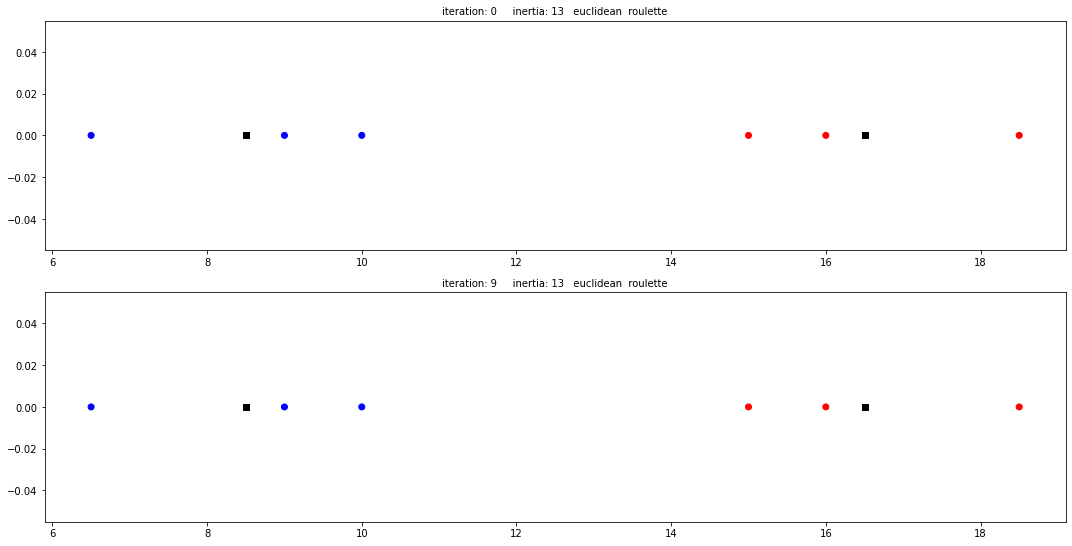

Labele: [1, 1, 1, 0, 0, 0]
Centroidi: [array([16.5,  0. ]), array([8.5, 0. ])]
SSE: 13.0


In [4]:
# Testiranje
brojKlastera = 2
model  = GACluster(brojKlastera, max_iter=10, population_size=19, category='roulette', distance = 'euclidean', mutation_rate=0.05)
model.fit(points)
print(f"Labele: {model.labels_}")
print(f"Centroidi: {model.cluster_centers_}")
print("SSE: {}".format(model.inertia_))

In [5]:
model.cluster_centers_[0], points[0], euclidean_distances(model.cluster_centers_[0], points[0]), model.inertia_

NameError: name 'euclidean_distances' is not defined

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model2 = KMeans(n_clusters=2)
model2.fit(points)
points, model2.labels_, model2.cluster_centers_, model2.inertia_

In [ ]:
euclidean_distances(points[0], model2.cluster_centers_[0]) + euclidean_distances(points[1], model2.cluster_centers_[0]) + euclidean_distances(points[2], model2.cluster_centers_[0]) + euclidean_distances(points[3], model2.cluster_centers_[1]) + euclidean_distances(points[4], model2.cluster_centers_[1]) + euclidean_distances(points[5], model2.cluster_centers_[1])

## Testiranje na vecem skupu

In [ ]:
x = [random.randint(0,20)  for i in range(30)]
y = [random.randint(0,20)  for i in range(30)]
xs1 = list(zip(x, y))
plt.scatter(x,   y )

x = [random.randint(20,40)  for i in range(30)]
y = [random.randint(20,40)  for i in range(30)]
xs2 = list(zip(x, y))
plt.scatter(x,   y )
xs = xs1 + xs2

In [ ]:
points2 = xs

In [ ]:
model_2 = GACluster(n_clusters=3, max_iter=100, population_size=10, mutation_rate=0.2, category='roulette', distance = 'euclidean', elitism_size=4)

In [ ]:
model_2.fit(points2)

In [ ]:
#Crtanje dobijenog rezultata
colors  =  {0:'r', 1:'b', 2:'m'}
labels = model_2.labels_
for i in range(len(points2)):
    plt.scatter(points2[i][0], points2[i][1], c=colors[labels[i]])

# Crtanje centroida
centres = model_2.cluster_centers_
for i in range(len(centres)):
    plt.scatter(centres[i][0], centres[i][1], c='black', marker='X')

In [ ]:
## SSE 
model_2.inertia_

## K-Means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model_k_means = KMeans(n_clusters=3, )

In [ ]:
model_k_means.fit(points2)

In [ ]:
labels = model_k_means.labels_
labels

In [ ]:
cenntres = model_k_means.cluster_centers_
cenntres

In [ ]:
#Crtanje doijenog rezultata
colors  =  {0:'r', 1:'b', 2:'m'}
for i in range(len(points2)):
    plt.scatter(points2[i][0], points2[i][1], c=colors[labels[i]])

# Crtanje centroida
for i in range(len(centres)):
    plt.scatter(centres[i][0], centres[i][1], c='black', marker='X')

In [ ]:
## SSE
model_k_means.inertia_

In [ ]:
from numpy import linalg as LA

In [ ]:
LA.norm([3,4])

In [ ]:
type(points2), points2[0]

### Skup 1 za testiranje

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
n_samples = 1500
random_state = 100
X, labels = make_blobs(n_samples=n_samples, random_state=random_state)
colors = np.array(['r', 'g', 'b', 'y', 'p'])

In [ ]:
len(X), X[0]

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(221)
_ = plt.scatter(X[:, 0], X[:, 1],c = colors[labels]) #Pocetno stanje, Ovakvo klasterovanje zelim da dobijem

In [ ]:
X = list(map(lambda p: tuple(p), X))

###  Parametri za testiranje

| max_iter | pop_size | category | t_size | mutation_rate | elitism_size |    sse   | silhouette_coef |  K_Means_silhouette | K_means siluette
| :------: | :------: | :-------:| :-----:| :-----------: | :-----------:| :-----------:| :-----------:|:-----------:|:-----------:|
| 10      |    4    | roulette |  /     |   0.05        |      2       |    3095         |   0.838 | 3095 | 0.838 |
| 4      |    4    | roulette |  /     |   0.1        |      2       |    3095         |   0.838 | 3095 | 0.838 |
| 4      |    4    | tournament |  2     |   0.05        |      2       |    3095         |   0.838 | 3095 | 0.838 |
| 10      |    10    | tournament |    2   |   0.1        |      2       |    3095         |   0.838 | 3095 | 0.838 |


* Na ovako lepo razdvojena 3 kalstera algoritam je u stanju da brzo nadje 'optimalne' centroide
* Dakle, nema smisla povecavati broj iteracija ili velicinu populacije
* Algoritam je nasao iste centroide kao KMeans

### 1)

In [ ]:
model = GACluster(n_clusters=3, max_iter=10, population_size=4, mutation_rate=0.05, elitism_size=2)

In [ ]:
model.fit(X)

In [ ]:
model.inertia_

In [ ]:
silhouette_score(X, model.labels_)

In [ ]:
#Plots
#TODO

### 2)

In [ ]:
model = GACluster(n_clusters=3, max_iter=4, population_size=4, mutation_rate=0.05, elitism_size=2)

In [ ]:
model.fit(X)

In [ ]:
model.inertia_

In [ ]:
silhouette_score(X, labels=model.labels_)

In [ ]:
#Plots 
#TODO

### 3)

In [ ]:
model = GACluster(n_clusters=3, max_iter=4, category='tournament',population_size=4, mutation_rate=0.05, elitism_size=2)

In [ ]:
model.fit(X)

In [ ]:
model.inertia_

In [ ]:
silhouette_score(X, labels=model.labels_)

In [ ]:
#Plots
#TODO

### 4)

In [ ]:
model = GACluster(n_clusters=3, max_iter=10, category='tournament',population_size=10, mutation_rate=0.1, elitism_size=2)

In [ ]:
model.fit(X)

In [ ]:
model.inertia_

In [ ]:
silhouette_score(X, labels=model.labels_)

In [ ]:
# Plots
# TODO